In [9]:
import pandas as pd
from tqdm import tqdm
import numpy as np
import os
import h5py
import matplotlib.pyplot as plt

In [2]:
fold = 0
fold_0 = pd.read_csv(f'../../data/oof/fold_{fold}.csv')
train_base_df = pd.read_csv('../../data/train_fold_v11.csv')
fold_0_ori = train_base_df[train_base_df['fold'] == fold]

In [3]:
fold_0.head(5)

,Unnamed: 0,ids,count,argmax_list,0,1,2,3,4,5,...,9,10,11,12,13,14,15,16,17,18
0,0,5ffaea8a-bb99-11e8-b2b9-ac1f6b6435d0,13,7,0.062239,0.062437,0.011512,0.062143,0.062498,0.062365,...,0.060353,0.062408,0.062049,0.062525,0.061705,0.035932,0.061209,0.062468,0.063579,0.049270
1,1,5ffaea8a-bb99-11e8-b2b9-ac1f6b6435d0,15,2,0.062575,0.062437,0.084030,0.062968,0.062498,0.062365,...,0.067526,0.062347,0.061416,0.062494,0.064289,0.037730,0.055868,0.062468,0.062197,0.064010
2,2,5ffaea8a-bb99-11e8-b2b9-ac1f6b6435d0,1,7,0.062270,0.062620,0.084359,0.062508,0.062498,0.062395,...,0.060946,0.063608,0.067617,0.062494,0.061856,0.036108,0.057193,0.062498,0.062379,0.052448
3,3,5ffaea8a-bb99-11e8-b2b9-ac1f6b6435d0,21,7,0.062239,0.062437,0.023650,0.062204,0.062498,0.062365,...,0.060708,0.062408,0.062780,0.062525,0.061796,0.035950,0.058008,0.062468,0.062349,0.054564
4,4,5ffaea8a-bb99-11e8-b2b9-ac1f6b6435d0,2,2,0.063405,0.062681,0.084979,0.062204,0.062498,0.062365,...,0.069365,0.062377,0.061716,0.062494,0.063633,0.036108,0.056087,0.062468,0.062227,0.046922


In [9]:
fold_0_ori.head()

,ID,Label,0,1,2,3,4,5,6,7,...,12,13,14,15,16,17,18,selected_cells,is_single,fold
10,5ffaea8a-bb99-11e8-b2b9-ac1f6b6435d0,7|2,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,28,NaN,0
11,5fb9edb4-bb99-11e8-b2b9-ac1f6b6435d0,9,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,15,NaN,0
14,5beb608c-bb99-11e8-b2b9-ac1f6b6435d0,6,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,14,NaN,0
32,6f2690b8-bb99-11e8-b2b9-ac1f6b6435d0,10,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,18,NaN,0
40,730301da-bb99-11e8-b2b9-ac1f6b6435d0,12|8|4,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,9,NaN,0


In [69]:
odi_ids = fold_0_ori['ID'].values
Label = fold_0_ori['Label'].values

idx_list = []
for i in tqdm(range(len(odi_ids))):
    #print(odi_ids[i])
    sel_df = fold_0[fold_0['ids'] == odi_ids[i]]
    
    lab_list = Label[i].split('|')
    sel_idx = sel_df.index
    #print(sel_idx)
    for j in sel_idx:
        #print('this is j ',j)
        row = sel_df.loc[j]
        #print(row)
        if str(row['argmax_list']) in lab_list:
            #print(f'Label {lab_list} row {str(row["argmax_list"])} ')
            idx_list.append(j)
    

100%|██████████| 8590/8590 [02:06<00:00, 67.64it/s]


In [76]:
fold_0_filtered_1 = fold_0.iloc[idx_list]
fold_0_filtered_1.to_csv('../../data/oof/fold_0_filtered_1.csv')

In [72]:
print('initial df ',fold_0.shape)
print('selected df ',fold_0_filtered_1.shape)


initial df  (123454, 23)
selected df  (59843, 23)


## lets examine our class 11

In [74]:
fold_0_filtered_1[fold_0_filtered_1['argmax_list'] == 11]

,Unnamed: 0,ids,count,argmax_list,0,1,2,3,4,5,...,9,10,11,12,13,14,15,16,17,18
7243,7243,26bd20ba-bba0-11e8-b2b9-ac1f6b6435d0,6,11,0.044889,0.060598,0.062341,0.061812,0.062395,0.062487,...,0.062285,0.061360,0.086018,0.062810,0.033396,0.059589,0.062649,0.080900,0.062504,0.048738
7244,7244,26bd20ba-bba0-11e8-b2b9-ac1f6b6435d0,22,11,0.044475,0.061044,0.062371,0.061782,0.062486,0.062487,...,0.062346,0.075510,0.110382,0.062688,0.052771,0.059589,0.062466,0.078949,0.062504,0.057655
12816,12816,f3d54dee-bba4-11e8-b2ba-ac1f6b6435d0,16,11,0.062389,0.062177,0.062202,0.062082,0.062485,0.062500,...,0.062445,0.063290,0.085033,0.063862,0.038764,0.043694,0.062664,0.074420,0.062538,0.050505
12818,12818,f3d54dee-bba4-11e8-b2ba-ac1f6b6435d0,26,11,0.062419,0.061934,0.062232,0.062082,0.062699,0.062500,...,0.062506,0.063507,0.089506,0.065090,0.064949,0.043631,0.062511,0.074820,0.062477,0.055604
12819,12819,f3d54dee-bba4-11e8-b2ba-ac1f6b6435d0,29,11,0.062450,0.061633,0.062202,0.062052,0.062485,0.062500,...,0.062445,0.062278,0.076465,0.063706,0.041730,0.043652,0.062481,0.075077,0.062477,0.050320
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118758,118758,1918_D10_5,9,11,0.061706,0.061236,0.062548,0.062319,0.062557,0.062496,...,0.062630,0.070899,0.107610,0.063228,0.082389,0.059451,0.062354,0.059594,0.062498,0.067226
118818,118818,1848_A3_35,25,11,0.054271,0.066590,0.062566,0.062502,0.062565,0.062494,...,0.062538,0.045331,0.076548,0.037691,0.070002,0.062566,0.062361,0.052686,0.062427,0.066524
118819,118819,1848_A3_35,15,11,0.058252,0.068704,0.062353,0.062471,0.062504,0.062494,...,0.062446,0.043023,0.083254,0.038266,0.071105,0.062505,0.062117,0.043935,0.062427,0.060641
121008,121008,1642_E10_25,30,11,0.062500,0.062578,0.062523,0.062479,0.062590,0.062517,...,0.062494,0.067226,0.082030,0.056185,0.075948,0.061072,0.062462,0.040157,0.061761,0.064088


In [77]:
fold_0_filtered_1[fold_0_filtered_1['ids'] == 'f3d54dee-bba4-11e8-b2ba-ac1f6b6435d0']

,Unnamed: 0,ids,count,argmax_list,0,1,2,3,4,5,...,9,10,11,12,13,14,15,16,17,18
12814,12814,f3d54dee-bba4-11e8-b2ba-ac1f6b6435d0,8,16,0.041775,0.062720,0.062544,0.062595,0.062544,0.024168,...,0.060036,0.062790,0.068818,0.047681,0.017703,0.060249,0.062593,0.239712,0.042476,0.059700
12815,12815,f3d54dee-bba4-11e8-b2ba-ac1f6b6435d0,21,16,0.041815,0.062812,0.062666,0.062595,0.062911,0.024168,...,0.060036,0.065932,0.150690,0.049339,0.058793,0.060190,0.062532,0.238660,0.042497,0.061580
12816,12816,f3d54dee-bba4-11e8-b2ba-ac1f6b6435d0,16,11,0.062389,0.062177,0.062202,0.062082,0.062485,0.062500,...,0.062445,0.063290,0.085033,0.063862,0.038764,0.043694,0.062664,0.074420,0.062538,0.050505
12818,12818,f3d54dee-bba4-11e8-b2ba-ac1f6b6435d0,26,11,0.062419,0.061934,0.062232,0.062082,0.062699,0.062500,...,0.062506,0.063507,0.089506,0.065090,0.064949,0.043631,0.062511,0.074820,0.062477,0.055604
12819,12819,f3d54dee-bba4-11e8-b2ba-ac1f6b6435d0,29,11,0.062450,0.061633,0.062202,0.062052,0.062485,0.062500,...,0.062445,0.062278,0.076465,0.063706,0.041730,0.043652,0.062481,0.075077,0.062477,0.050320
12822,12822,f3d54dee-bba4-11e8-b2ba-ac1f6b6435d0,18,16,0.062358,0.061693,0.062171,0.062021,0.062515,0.062500,...,0.062475,0.062553,0.070306,0.064426,0.057500,0.043652,0.062481,0.074492,0.062538,0.053631
12823,12823,f3d54dee-bba4-11e8-b2ba-ac1f6b6435d0,28,16,0.062389,0.062451,0.062263,0.062295,0.062607,0.062500,...,0.062506,0.063352,0.066143,0.062780,0.055772,0.043652,0.062511,0.074565,0.062477,0.057939
12826,12826,f3d54dee-bba4-11e8-b2ba-ac1f6b6435d0,13,16,0.062358,0.061573,0.062171,0.062112,0.062393,0.062500,...,0.062445,0.062036,0.051638,0.061626,0.035226,0.045791,0.062420,0.071429,0.062538,0.057488
12828,12828,f3d54dee-bba4-11e8-b2ba-ac1f6b6435d0,11,16,0.062419,0.062238,0.062263,0.062173,0.062699,0.062500,...,0.062567,0.062920,0.065660,0.063396,0.068166,0.043609,0.062603,0.075113,0.062569,0.050332
12829,12829,f3d54dee-bba4-11e8-b2ba-ac1f6b6435d0,6,16,0.062389,0.061723,0.062232,0.062355,0.062546,0.062500,...,0.062475,0.062127,0.052554,0.061988,0.036594,0.043609,0.062450,0.075223,0.062599,0.046346


In [8]:
fold_0 = pd.read_csv(f'../../data/oof/fold_{0}.csv')
fold_1 = pd.read_csv(f'../../data/oof/fold_{1}.csv')
fold_2 = pd.read_csv(f'../../data/oof/fold_{2}.csv')
fold_3 = pd.read_csv(f'../../data/oof/fold_{3}.csv')
fold_4 = pd.read_csv(f'../../data/oof/fold_{4}.csv')

unfiltered_1 = pd.concat([fold_0, fold_1, fold_2, fold_3, fold_4])
unfiltered_1.to_csv(f'../../data/oof/un_filtered_1.csv',index=False)

In [2]:
for fold in range(0,5):
    fold_0 = pd.read_csv(f'../../data/oof/fold_{fold}.csv')
    train_base_df = pd.read_csv('../../data/train_fold_v11.csv')
    fold_0_ori = train_base_df[train_base_df['fold'] == fold]

    odi_ids = fold_0_ori['ID'].values
    Label = fold_0_ori['Label'].values

    idx_list = []
    for i in tqdm(range(len(odi_ids))):
        #print(odi_ids[i])
        sel_df = fold_0[fold_0['ids'] == odi_ids[i]]

        lab_list = Label[i].split('|')
        sel_idx = sel_df.index
        #print(sel_idx)
        for j in sel_idx:
            #print('this is j ',j)
            row = sel_df.loc[j]
            #print(row)
            if str(row['argmax_list']) in lab_list:
                #print(f'Label {lab_list} row {str(row["argmax_list"])} ')
                idx_list.append(j)
    fold_0_filtered_1 = fold_0.iloc[idx_list]
    fold_0_filtered_1.to_csv(f'../../data/oof/fold_{fold}_filtered_1.csv',index=False)

    print('initial df ',fold_0.shape)
    print('selected df ',fold_0_filtered_1.shape)


100%|██████████| 8590/8590 [02:31<00:00, 56.61it/s]


initial df  (123454, 23)
selected df  (59843, 23)


100%|██████████| 8605/8605 [02:34<00:00, 55.55it/s]


initial df  (125496, 23)
selected df  (63077, 23)


100%|██████████| 8614/8614 [02:35<00:00, 55.32it/s]


initial df  (125666, 23)
selected df  (65299, 23)


100%|██████████| 8568/8568 [02:45<00:00, 51.63it/s]


initial df  (124285, 23)
selected df  (65557, 23)


100%|██████████| 8616/8616 [02:35<00:00, 55.58it/s]


initial df  (125272, 23)
selected df  (63915, 23)


## lets combine them all 

In [4]:
fold_0 = pd.read_csv('../../data/oof/fold_0_filtered_1.csv')
fold_1 = pd.read_csv('../../data/oof/fold_1_filtered_1.csv')
fold_2 = pd.read_csv('../../data/oof/fold_2_filtered_1.csv')
fold_3 = pd.read_csv('../../data/oof/fold_3_filtered_1.csv')
fold_4 = pd.read_csv('../../data/oof/fold_4_filtered_1.csv')

filtered_1 = pd.concat([fold_0, fold_1, fold_2, fold_3, fold_4])
filtered_1.to_csv(f'../../data/oof/filtered_1.csv',index=False)
### filtered_1 has onlu fold 0,1,2 as of now

In [89]:
filtered_1['ids'].unique().shape

(25072,)

In [96]:
filtered_1.head(2)

,Unnamed: 0,ids,count,argmax_list,0,1,2,3,4,5,...,9,10,11,12,13,14,15,16,17,18
0,0,5ffaea8a-bb99-11e8-b2b9-ac1f6b6435d0,13,7,0.062239,0.062437,0.011512,0.062143,0.062498,0.062365,...,0.060353,0.062408,0.062049,0.062525,0.061705,0.035932,0.061209,0.062468,0.063579,0.04927
1,1,5ffaea8a-bb99-11e8-b2b9-ac1f6b6435d0,15,2,0.062575,0.062437,0.084030,0.062968,0.062498,0.062365,...,0.067526,0.062347,0.061416,0.062494,0.064289,0.037730,0.055868,0.062468,0.062197,0.06401


In [105]:
filtered_1['count'].unique()

array([ 13,  15,   1,  21,   2,  24,   4,  12,  25,  10,  27,  18,  23,
        17,  22,  16,   5,  20,   8,  14,   9,  11,   7,   6,   3,  26,
        19,  28,  29,  30,  32,  31,  53,  34,  45,  49,  58,  33,  52,
        42,  40,  47,  44,  37,  36,  35,  43,  41,  39,  38,  46,  56,
        62,  63,  69,  51,  50,  59,  60,  55,  54,  48,  57,  77,  92,
        83,  88,  76,  73,  81,  84,  80,  82,  61,  78,  71,  86, 102,
        75, 114,  65,  87, 103, 101, 104, 123,  90, 116,  98, 122, 109,
        74, 106,  72,  70,  85,  79,  67,  66,  68,  64, 121, 120, 115,
       119,  96, 108, 111, 110,  89, 124, 138,  93, 141, 128,  91,  95,
       112,  94, 117, 100,  99,  97, 107, 155, 126, 142, 146, 136, 161,
       135, 131, 162, 156, 129, 151, 160, 137, 145, 150, 125, 165, 127,
       173, 113, 105, 132, 118, 134, 140])

In [100]:
list(filtered_1['count'].values)

[13,
 15,
 1,
 21,
 2,
 24,
 4,
 12,
 25,
 10,
 27,
 18,
 23,
 17,
 22,
 16,
 5,
 20,
 8,
 14,
 9,
 10,
 5,
 11,
 7,
 13,
 6,
 3,
 7,
 2,
 11,
 4,
 9,
 10,
 1,
 8,
 17,
 7,
 4,
 3,
 6,
 2,
 1,
 9,
 7,
 1,
 8,
 3,
 7,
 24,
 15,
 17,
 20,
 5,
 18,
 26,
 4,
 3,
 5,
 9,
 1,
 10,
 7,
 15,
 3,
 1,
 4,
 2,
 4,
 19,
 5,
 9,
 4,
 6,
 3,
 13,
 10,
 11,
 20,
 7,
 14,
 1,
 8,
 18,
 4,
 9,
 6,
 2,
 7,
 5,
 8,
 4,
 6,
 13,
 10,
 11,
 4,
 1,
 3,
 5,
 12,
 6,
 8,
 9,
 2,
 4,
 5,
 18,
 20,
 21,
 1,
 8,
 13,
 17,
 12,
 14,
 9,
 6,
 5,
 2,
 8,
 3,
 8,
 2,
 19,
 15,
 8,
 3,
 9,
 5,
 7,
 2,
 13,
 2,
 4,
 5,
 5,
 3,
 9,
 7,
 4,
 10,
 2,
 6,
 2,
 6,
 11,
 4,
 8,
 1,
 5,
 2,
 4,
 12,
 7,
 3,
 10,
 11,
 11,
 3,
 7,
 14,
 9,
 6,
 2,
 15,
 5,
 18,
 16,
 13,
 17,
 10,
 8,
 4,
 1,
 12,
 16,
 3,
 9,
 10,
 17,
 13,
 6,
 20,
 13,
 18,
 9,
 12,
 1,
 2,
 6,
 4,
 10,
 8,
 7,
 12,
 9,
 5,
 7,
 4,
 2,
 6,
 2,
 5,
 7,
 3,
 9,
 4,
 1,
 8,
 11,
 12,
 18,
 1,
 8,
 6,
 23,
 3,
 28,
 21,
 15,
 20,
 16,
 7,
 25,
 5,
 1,
 10,
 1,

## now we will stratify and start to work

In [5]:
train_base_df = pd.read_csv('../../data/train_fold_v11.csv')
filtered_1 = pd.read_csv(f'../../data/oof/filtered_1.csv')
train_base_df.head()

,ID,Label,0,1,2,3,4,5,6,7,...,12,13,14,15,16,17,18,selected_cells,is_single,fold
0,5c27f04c-bb99-11e8-b2b9-ac1f6b6435d0,8|5|0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,6,NaN,1
1,5fb643ee-bb99-11e8-b2b9-ac1f6b6435d0,14|0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,12,NaN,4
2,60b57878-bb99-11e8-b2b9-ac1f6b6435d0,6|1,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,13,NaN,3
3,5c1a898e-bb99-11e8-b2b9-ac1f6b6435d0,16|10,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,12,NaN,1
4,5e22a522-bb99-11e8-b2b9-ac1f6b6435d0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,8,NaN,3


In [10]:
filtered_1[filtered_1['ids']=='57941108-bbbe-11e8-b2ba-ac1f6b6435d0']

,Unnamed: 0,ids,count,argmax_list,0,1,2,3,4,5,...,9,10,11,12,13,14,15,16,17,18


In [6]:
print(train_base_df.shape)
train_initial = train_base_df#[train_base_df['fold'].isin([0,1,2,3,4])]
train_initial = train_initial[train_initial['ID'].isin(filtered_1['ids'].unique())]
print(train_initial.shape)

(42993, 24)
(41791, 24)


In [7]:
from iterstrat.ml_stratifiers import MultilabelStratifiedKFold

SEED = 1
FOLDS = 3

labels = [str(i) for i in range(19)]

filtered_full = train_initial.reset_index(drop = True)

skf = MultilabelStratifiedKFold(n_splits=FOLDS, shuffle=True, 
          random_state=SEED)

filtered_full['fold'] = -1
for fold,(idxT,idxV) in enumerate( skf.split(filtered_full,filtered_full[labels].values)):
    filtered_full['fold'][idxV] = fold
    
print(filtered_full.shape)
filtered_full.head()

#filtered_full = filtered_full.drop(['Unnamed: 0'], axis = 1)
filtered_full.to_csv('../../data/oof/train_v1.csv', index = False)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:72: FutureWarning: Pass shuffle=True, random_state=1 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


(41791, 24)


In [15]:
filtered_full[filtered_full['ID']=='57941108-bbbe-11e8-b2ba-ac1f6b6435d0']

,ID,Label,0,1,2,3,4,5,6,7,...,12,13,14,15,16,17,18,selected_cells,is_single,fold


## lets check the dataloader

In [16]:
import sys
sys.path.append('../')
import pandas as pd
from utils import hpa_dataset_v3
import albumentations as albu
import matplotlib.pyplot as plt
import torch.utils.data as data


In [2]:
aug_fn = albu.Compose(
        [
            #'''
            #RandomAugMix(p=.5),
            #albu.OneOf([
            #    albu.ShiftScaleRotate(shift_limit=0.2, scale_limit=0.4, rotate_limit=40, border_mode = 1),
            #    albu.ElasticTransform(alpha=1, sigma=50, alpha_affine=50, border_mode=1),
            #    albu.GridDistortion(num_steps=3, distort_limit=0.4, interpolation=1, border_mode=1),#num_steps=5, distort_limit=0.3
            #], p=.5),
            
            #'''
            albu.HorizontalFlip(p=.5),
            albu.VerticalFlip(p=.5),
            albu.Cutout(
                num_holes=12,
                max_h_size=16,
                max_w_size=16,
                fill_value=0,
                p=0.5,
            ),
            albu.ToFloat(max_value=255.,always_apply=True),
        ]
    )

In [17]:
fold = 0
train_base_df = pd.read_csv('../../data/oof/train_v1.csv')
train_df = train_base_df[train_base_df['fold'] != fold]
valid_df = train_base_df[train_base_df['fold'] == fold]

filtered_df = pd.read_csv('../../data/oof/filtered_1.csv')

In [21]:
train_df[str(11)].sum()

84

In [4]:
train_dataset = hpa_dataset_v3( train_df, filtered_df, augmentation = aug_fn, path='../../data/train_h5_256_40000_v6',  
                               aug_per = 0.8, cells_used = 8, label_smoothing = False, 
                               l_alp = 0.3, is_validation = False, size = 256, cell_repetition = True)

In [5]:
BATCH_SIZE = 2
WORKERS = 4
train_dataloader = data.DataLoader(
            train_dataset,
            batch_size=BATCH_SIZE,
            shuffle=True,
            num_workers=WORKERS,
            drop_last=False,
            pin_memory=True,
            
        )

In [12]:
valid_dataset = hpa_dataset_v3( valid_df, filtered_df, augmentation = None, path='../../data/train_h5_256_40000_v6',  
                               aug_per = 0.0, cells_used = 8, label_smoothing = False, 
                               l_alp = 0.3, is_validation = False, size = 256, cell_repetition = True)

In [6]:
v = train_dataset.__getitem__(1857)
print(v['image'].shape)
print(v['label'])

(8, 256, 256, 5)
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


In [17]:
v = valid_dataset.__getitem__(34)
print(v['image'].shape)
print(v['label'])

thsi is usinq calue  [16, 4]
this is in lesser  [3, 5, 6]
3
5
6
cell_choice  3
cell_choice  3
cell_choice  5
cell_choice  6
cell_choice  6
(8, 256, 256, 5)
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


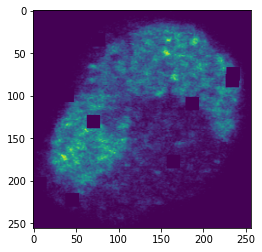

In [26]:
plt.imshow(v['image'][0,:,:,2])

## bagging lets see if that is a thing

In [35]:
def bagging(paths,weights):
    cols = [f"{i}" for i in range(19)]
    scores = []
    for path in paths:
        df = pd.read_csv(path)#.sort_values("encoding").reset_index(drop=True)
        score = np.empty((len(df), 19))
        #print('shape ',df[cols].values.shape)
        o = df[cols].values.argsort(1)
        #print(o)
        score[np.arange(len(df))[:, None], o] = np.arange(19)[None]
        scores.append(score)
    scores = np.stack(scores)
    sub_score = np.sum(scores*weights[:, None, None], 0)
    df[cols] = sub_score
    return df#sub_stage_1

In [38]:
paths = [f'../../data/submissions/test_{"v6_6"}_loss/stage_1.csv',
         f'../../data/submissions/test_{"v6_6_3"}_loss/stage_1.csv',
        
]

'''WORK_LOCATION = f'data/submissions/test_{"v6_6"}_{metric_use}/'
test_enc_df = pd.read_csv(os.path.join(WORK_LOCATION,'stage_1.csv'))

WORK_LOCATION = f'data/submissions/test_{"v6_6_3"}_{metric_use}/'   #effb0 one
test_enc_df_1 = pd.read_csv(os.path.join(WORK_LOCATION,'stage_1.csv'))'''
#weights = np.array([0.55, 0.35, 0.1])
weights = np.array([0.5,0.5])
test_enc_df = bagging(paths,weights)

In [39]:
test_enc_df.head()

,ID,count,encoding,0,1,2,3,4,5,6,...,9,10,11,12,13,14,15,16,17,18
0,0040581b-f1f2-4fbe-b043-b6bfea5404bb,1,eNqtVm2PojAQ/ksMZe+Sy21yubtc4gKDIkpBUJQ3KyD//9...,16.0,1.0,14.5,15.5,8.5,12.5,7.5,...,9.5,5.0,4.0,12.5,9.5,3.5,2.0,16.5,17.0,9.0
1,0040581b-f1f2-4fbe-b043-b6bfea5404bb,2,eNrVUm1PwkAM/kvt3XgRjEajvO7uhGCEEHCgcSQi/v9vXt...,10.5,1.0,17.5,16.5,5.0,3.5,13.0,...,9.0,3.5,5.0,9.0,9.0,10.5,4.0,17.0,14.0,0.0
2,0040581b-f1f2-4fbe-b043-b6bfea5404bb,3,eNoLCEgJMg4wDMg3NPQ39Df2NfaF0EZ+IBoBIXzc8oSgAR...,17.5,2.5,17.0,13.5,10.0,11.0,7.0,...,8.0,0.5,1.0,13.5,9.5,7.5,4.0,16.0,15.5,3.0
3,0040581b-f1f2-4fbe-b043-b6bfea5404bb,4,eNptUstOAzEM/CUnXtoiAQcegnbzOMAFgdRFbIXEpf9/q+...,15.0,4.0,10.0,12.5,4.5,16.0,9.0,...,12.0,1.0,7.0,12.0,13.5,2.0,4.5,18.0,17.0,5.5
4,0040581b-f1f2-4fbe-b043-b6bfea5404bb,5,eNp9UcuSmzAQ/CVGku1U8CGpxBs7EsMrPNdgMNYasIH/v0...,17.0,0.0,14.5,14.5,7.5,13.0,5.5,...,6.5,2.5,5.5,11.5,8.0,7.0,6.5,16.0,18.0,5.0


In [43]:
n_classes = 19
tokens_list = test_enc_df.ID.unique()

prediction_string_list = []
token_list = []
for tok in tokens_list:
    prediction_str = ''
    sub_d = test_enc_df[test_enc_df['ID'] == tok]
    for i in range(len(sub_d)):
        info = sub_d.iloc[i]
        encoding = info['encoding']
        class_pred = info[[str(j) for j in range(n_classes)]].values
        for count, k in enumerate(class_pred):
            prediction_str += f'{count} {k} ' + encoding + ' '
    #here we might have to check if the string has len > 0 . maybe we might get '' also ......
    prediction_str = prediction_str.strip()# hopefuly removes the final space
    token_list.append(tok)  
    prediction_string_list.append(prediction_str)

sub_stage_2_df = pd.DataFrame.from_dict({'ID':token_list,"PredictionString":prediction_string_list })

sub = pd.read_csv('../../data/sample_submission.csv')
sub = sub.drop(['PredictionString'],axis=1)
sub = sub.merge(sub_stage_2_df, on='ID')

WORK_LOCATION = f'../../data/submissions/test_ensamble_7/'

if not os.path.exists(WORK_LOCATION):
        os.mkdir(WORK_LOCATION)
sub.to_csv(os.path.join(WORK_LOCATION,'submission_ensamble_7.csv'), index=False)

# Now we will generate rank and use it for finding the top 2 classes

In [45]:
unfiltered_1 = pd.read_csv(f'../../data/oof/un_filtered_1.csv')

In [46]:
unfiltered_1.head()

,Unnamed: 0,ids,count,argmax_list,0,1,2,3,4,5,...,9,10,11,12,13,14,15,16,17,18
0,0,5ffaea8a-bb99-11e8-b2b9-ac1f6b6435d0,13,7,0.062239,0.062437,0.011512,0.062143,0.062498,0.062365,...,0.060353,0.062408,0.062049,0.062525,0.061705,0.035932,0.061209,0.062468,0.063579,0.049270
1,1,5ffaea8a-bb99-11e8-b2b9-ac1f6b6435d0,15,2,0.062575,0.062437,0.084030,0.062968,0.062498,0.062365,...,0.067526,0.062347,0.061416,0.062494,0.064289,0.037730,0.055868,0.062468,0.062197,0.064010
2,2,5ffaea8a-bb99-11e8-b2b9-ac1f6b6435d0,1,7,0.062270,0.062620,0.084359,0.062508,0.062498,0.062395,...,0.060946,0.063608,0.067617,0.062494,0.061856,0.036108,0.057193,0.062498,0.062379,0.052448
3,3,5ffaea8a-bb99-11e8-b2b9-ac1f6b6435d0,21,7,0.062239,0.062437,0.023650,0.062204,0.062498,0.062365,...,0.060708,0.062408,0.062780,0.062525,0.061796,0.035950,0.058008,0.062468,0.062349,0.054564
4,4,5ffaea8a-bb99-11e8-b2b9-ac1f6b6435d0,2,2,0.063405,0.062681,0.084979,0.062204,0.062498,0.062365,...,0.069365,0.062377,0.061716,0.062494,0.063633,0.036108,0.056087,0.062468,0.062227,0.046922


In [68]:
cols = [f"{i}" for i in range(19)]
o = unfiltered_1[cols].values.argsort(1)
unfiltered_1[['sec','first']] = o[:,-2:]## the numbers returned are the classes i.e 0,1,2,3..19 are teh classes index arranged in ascending order

In [69]:
unfiltered_1.head(2)

,Unnamed: 0,ids,count,argmax_list,0,1,2,3,4,5,...,11,12,13,14,15,16,17,18,sec,first
0,0,5ffaea8a-bb99-11e8-b2b9-ac1f6b6435d0,13,7,0.062239,0.062437,0.011512,0.062143,0.062498,0.062365,...,0.062049,0.062525,0.061705,0.035932,0.061209,0.062468,0.063579,0.04927,17,7
1,1,5ffaea8a-bb99-11e8-b2b9-ac1f6b6435d0,15,2,0.062575,0.062437,0.084030,0.062968,0.062498,0.062365,...,0.061416,0.062494,0.064289,0.037730,0.055868,0.062468,0.062197,0.06401,9,2


In [70]:
unfiltered_1.to_csv(f'../../data/oof/un_filtered_1.csv',index=False)

In [74]:

fold_0 = pd.read_csv(f'../../data/oof/un_filtered_1.csv')
train_base_df = pd.read_csv('../../data/train_fold_v11.csv')
fold_0_ori = train_base_df#[train_base_df['fold'] == fold]

odi_ids = fold_0_ori['ID'].values
Label = fold_0_ori['Label'].values

idx_list = []
for i in tqdm(range(len(odi_ids))):
    #print(odi_ids[i])
    sel_df = fold_0[fold_0['ids'] == odi_ids[i]]

    lab_list = Label[i].split('|')
    sel_idx = sel_df.index
    #print(sel_idx)
    for j in sel_idx:
        #print('this is j ',j)
        row = sel_df.loc[j]
        
        if str(row['first']) in lab_list:
            #print(f'Label {lab_list} row {str(row["argmax_list"])} ')
            #print('fir')
            idx_list.append(j)
        elif str(row['sec']) in lab_list:
            idx_list.append(j)
            #print('sec')
        
fold_0_filtered_1 = fold_0.iloc[idx_list]
#fold_0_filtered_1.to_csv(f'../../data/oof/fold_{fold}_filtered_1.csv',index=False)

print('initial df ',fold_0.shape)
print('selected df ',fold_0_filtered_1.shape)


100%|██████████| 42993/42993 [31:04<00:00, 23.05it/s]


initial df  (374616, 25)
selected df  (241274, 25)


In [75]:
fold_0_filtered_1.to_csv(f'../../data/oof/filtered_2.csv',index=False)

In [81]:
train_df = pd.read_csv('../../data/oof/train_v1.csv')
print(train_df.shape)
train_df = train_df[train_df['ID'].isin(fold_0_filtered_1['ids'].unique())]
print(train_df.shape)
train_df.to_csv('../../data/oof/train_v2.csv')

(25072, 24)
(25070, 24)


## lets viz the attention based values

In [13]:
fold_0 = pd.read_csv(f'../../data/oof/un_filtered_1.csv')
train_base_df = pd.read_csv('../../data/train_fold_v11.csv')

In [11]:
fold_0.head()

,Unnamed: 0,ids,count,argmax_list,0,1,2,3,4,5,...,9,10,11,12,13,14,15,16,17,18
0,0,5ffaea8a-bb99-11e8-b2b9-ac1f6b6435d0,13,7,0.062239,0.062437,0.011512,0.062143,0.062498,0.062365,...,0.060353,0.062408,0.062049,0.062525,0.061705,0.035932,0.061209,0.062468,0.063579,0.049270
1,1,5ffaea8a-bb99-11e8-b2b9-ac1f6b6435d0,15,2,0.062575,0.062437,0.084030,0.062968,0.062498,0.062365,...,0.067526,0.062347,0.061416,0.062494,0.064289,0.037730,0.055868,0.062468,0.062197,0.064010
2,2,5ffaea8a-bb99-11e8-b2b9-ac1f6b6435d0,1,7,0.062270,0.062620,0.084359,0.062508,0.062498,0.062395,...,0.060946,0.063608,0.067617,0.062494,0.061856,0.036108,0.057193,0.062498,0.062379,0.052448
3,3,5ffaea8a-bb99-11e8-b2b9-ac1f6b6435d0,21,7,0.062239,0.062437,0.023650,0.062204,0.062498,0.062365,...,0.060708,0.062408,0.062780,0.062525,0.061796,0.035950,0.058008,0.062468,0.062349,0.054564
4,4,5ffaea8a-bb99-11e8-b2b9-ac1f6b6435d0,2,2,0.063405,0.062681,0.084979,0.062204,0.062498,0.062365,...,0.069365,0.062377,0.061716,0.062494,0.063633,0.036108,0.056087,0.062468,0.062227,0.046922


In [12]:
fold_0[fold_0['argmax_list'] == 11]

,Unnamed: 0,ids,count,argmax_list,0,1,2,3,4,5,...,9,10,11,12,13,14,15,16,17,18
58,58,6f2690b8-bb99-11e8-b2b9-ac1f6b6435d0,18,11,0.055485,0.034696,0.062723,0.062347,0.062781,0.062515,...,0.062437,0.122029,0.208817,0.063707,0.063910,0.061908,0.062496,0.034174,0.061611,0.037771
63,63,6f2690b8-bb99-11e8-b2b9-ac1f6b6435d0,13,11,0.056635,0.034696,0.062448,0.062469,0.062567,0.062546,...,0.062467,0.119844,0.181424,0.062780,0.064223,0.062607,0.062588,0.140099,0.061912,0.040947
64,64,6f2690b8-bb99-11e8-b2b9-ac1f6b6435d0,8,11,0.060765,0.057473,0.062511,0.062287,0.061294,0.062483,...,0.061956,0.093655,0.098153,0.044581,0.035287,0.062477,0.044577,0.035367,0.033104,0.063769
66,66,6f2690b8-bb99-11e8-b2b9-ac1f6b6435d0,5,11,0.060824,0.139529,0.062633,0.062470,0.065984,0.062513,...,0.061926,0.093655,0.174029,0.046063,0.035459,0.062538,0.044620,0.035246,0.033104,0.073833
67,67,6f2690b8-bb99-11e8-b2b9-ac1f6b6435d0,12,11,0.061182,0.057501,0.062541,0.062470,0.061264,0.062483,...,0.061956,0.093610,0.094514,0.044581,0.035616,0.062477,0.044577,0.068305,0.033184,0.065753
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
623996,125095,1916_B8_9,13,11,0.062466,0.062452,0.062473,0.062402,0.062498,0.062051,...,0.062515,0.078661,0.096139,0.061035,0.062527,0.061980,0.062320,0.062746,0.035650,0.065739
623998,125097,1916_B8_9,33,11,0.062618,0.062483,0.062718,0.063046,0.062498,0.066376,...,0.062485,0.064705,0.127550,0.061154,0.062466,0.062010,0.062442,0.066208,0.035321,0.062690
623999,125098,1916_B8_9,5,11,0.062863,0.063034,0.062534,0.063200,0.062529,0.064240,...,0.062546,0.077215,0.133867,0.084532,0.062649,0.061980,0.062533,0.062746,0.035407,0.097942
624064,125163,1386_F6_1,37,11,0.062500,0.061818,0.062498,0.062498,0.062500,0.062500,...,0.062494,0.062500,0.066646,0.062517,0.062498,0.062485,0.062498,0.054322,0.062494,0.059826


In [17]:
train_base_df[train_base_df['ID'].isin(['6f2690b8-bb99-11e8-b2b9-ac1f6b6435d0'])]['11']

32    0
Name: 11, dtype: int64

In [21]:
hdf5_path = f'../../data/train_h5_256_40000_v6/6f2690b8-bb99-11e8-b2b9-ac1f6b6435d0/6f2690b8-bb99-11e8-b2b9-ac1f6b6435d0_18.hdf5'

with h5py.File(hdf5_path,"r") as h:
    vv = h['train_img'][...]

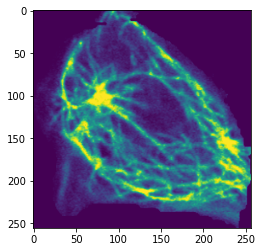

In [25]:
plt.imshow(vv[:,:,0])